# Data analysis of Amazon Fine Food Reviews

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''Loading the data in a panda dataframe'''
import pandas as pd
import seaborn as sns
am_df = pd.read_csv('data/Reviews.csv')

In [3]:
'''How to actual data looks in the file'''
am_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [4]:
am_df.shape

(568454, 10)

* The above dataset has 568454 reviews and 10 columns.
* ProductId is the identification number of the product used by Amazon.
* UserId is the identification number of the user who has given the review.
* Profile name is the name of the profile through which the user has given the review.
* HelpfulnessNumerator: Number of people who have found this review helpful.
* HelpfulnessDenominator: Total number of people who have voted that whether they are helpful or not.
* Time: The time is not to be interpreted as an long integer value. A reference point was set as 0

The above information was given after doing a little bit of research and manual review of the Reviews.csv file

In [5]:
import numpy as np

## Checking missing values

In [6]:
missing = np.where(am_df.isnull() == True)
print ('Missing locations: \n{}\n\nTotal count: {}'.format(missing, missing[0].shape[0]))

Missing locations: 
(array([ 25509,  33958,  38874,  40548,  49800,  67077, 101106, 102979,
       106550, 117515, 137613, 155712, 163191, 172462, 178290, 198474,
       212691, 237565, 293906, 297275, 299495, 300961, 306751, 333556,
       352043, 357215, 357814, 360782, 379473, 380558, 381313, 386283,
       431598, 440825, 484367, 486640, 490412, 491728, 503260, 515436,
       530716, 560446]), array([3, 8, 3, 8, 3, 3, 8, 8, 3, 8, 3, 8, 3, 3, 8, 8, 8, 8, 8, 3, 8, 8, 3,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 8, 8, 3, 3, 8, 3, 8, 3]))

Total count: 42


So there are 42 missing values in here, one such example is down below

In [7]:
print (am_df.iloc[25509])

Id                                                                    25510
ProductId                                                        B000LKZB4Y
UserId                                                       A36BVYD0NT7Z0F
ProfileName                                                             NaN
HelpfulnessNumerator                                                      0
HelpfulnessDenominator                                                    0
Score                                                                     5
Time                                                             1314576000
Summary                    These are the best mints and no aspartame or BHT
Text                      I was so shocked to find out that almost all g...
Name: 25509, dtype: object


42 missing values shouldn't hamper the data analysis and hence no need to remove them.

## Duplicates
Lets check for duplicates as it's a possiblility

In [8]:
imp_cols = set(am_df.columns)-{'Id','ProductId'}
print ('Number of duplicates:',am_df.duplicated(subset=imp_cols).sum())

Number of duplicates: 172145


Now that we have determined that there are duplicates, lets drop them

In [9]:
am_df = am_df.drop_duplicates(subset=imp_cols)

In [10]:
am_df.shape

(396309, 10)

After deleting the duplicate reviews there are around ~400,000 reviews

# Plots

    We will plot several graphs during our data analysis

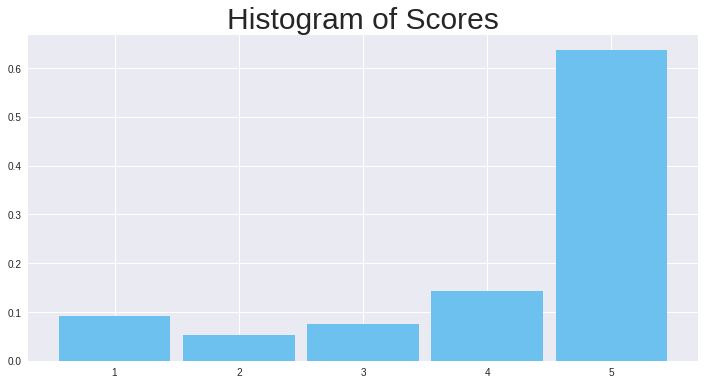

In [11]:
'''Plotting a histogram'''
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.hist(data=am_df,x='Score',bins=[1,2,3,4,5,6],color='#6CC1EE',normed=True,rwidth=0.9)
plt.xticks([1+.5,2+.5,3+.5,4+.5,5+.5],[1,2,3,4,5])
plt.title('Histogram of Scores',fontdict={'fontsize':30})
plt.show()

If we consider our Score 4, 5 to be positive and 1, 2 to be negative then we can conclude that positive reviews are more common

In [12]:
l = am_df.shape[0]
print ('Scores and percentage%')
for i in [1,2,3,4,5]:
    print('{}----{}'.format(i,list(am_df.Score).count(i)*100/l))

Scores and percentage%
1----9.28618830256189
2----5.275933678013873
3----7.54638426076622
4----14.21416117221663
5----63.67733258644139


Above we can see the percentage of the Scores, 5 star is ~63.67% and the least is 2 star with ~5.27%

In [13]:
'''Adding a criteria Review Length to the dataframe'''
am_df['Review Length'] = [len(row['Text'].split()) for index, row in am_df.iterrows()]

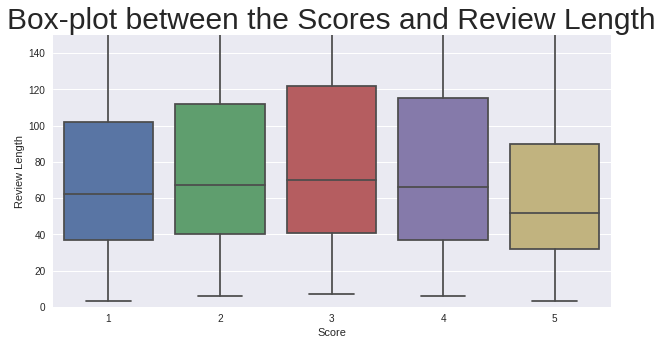

In [14]:
'''Plotting a box-plot between Score and Review Length'''
plt.figure(figsize=(10,5))
sns.boxplot(data=am_df,x='Score',y='Review Length')
plt.ylim(0,150)
plt.title('Box-plot between the Scores and Review Length',fontdict={'fontsize':30})
plt.show()

From the box plot above we can see that the when scores are 4, 5 the review lenght is less than when the score is 1, 2 which means that __Positive reviews are shorter__. <br>
Also the maximum length is when the score is 3.

In [15]:
'''Creating another feature called helpfulness ratio'''
am_df['help_ratio2'] = [(row['HelpfulnessNumerator'])/(row['HelpfulnessDenominator']+0.000001)\
                        for index,row in am_df.iterrows()]

In the above cell I have calculated the helpfulness ratio.<br>
Some of them have 0 in the denominator and therefore I'm adding 0.000001 to the denominator

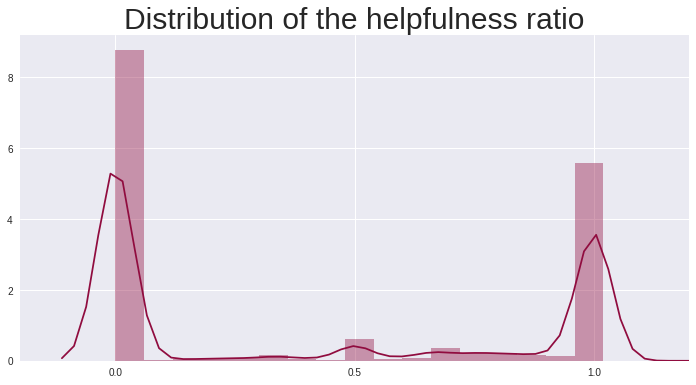

In [16]:
'''Let's see the distribution of the help_ratio that we just created'''
plt.figure(figsize=(12,6))
sns.distplot(list(am_df.help_ratio2),color='#900c3f')
plt.title('Distribution of the helpfulness ratio',fontdict={'fontsize':30})
plt.xticks([0,0.5,1])
plt.xlim(-.2,1.2)
plt.show()

    Here we have taken the unrated review together with the completely unrated review.
    Completely unhelpful and unrated reviews are the highest, then the most helpfull ones whose helpfulness ratio is 1 and then we can see a slight bump when people have found some reviews eqaully helpfull and unhelpfull 

In [17]:
'''Lets now separate the reviews which are unrated'''
separated_ratio = []
tmp_deno = list(am_df.HelpfulnessDenominator);
tmp_num = list(am_df.HelpfulnessNumerator)
for i in range(len(tmp_deno)):
    if(tmp_deno[i]==0):
        separated_ratio.append(-1)
    else:
        separated_ratio.append(tmp_num[i]/tmp_deno[i])

    In the above cell, I'm separating the unrated reviews from the completely unhelpfull reviews and creating a new column called help_ratio

In [18]:
am_df['help_ratio'] = separated_ratio

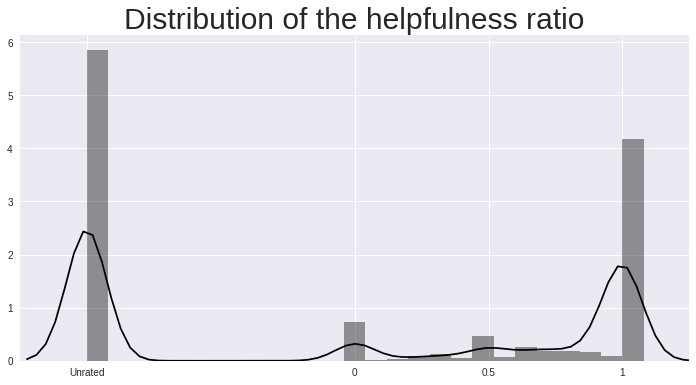

In [19]:
'''Plotting the distribution when unrated reviews are separated'''
plt.figure(figsize=(12,6))
sns.distplot(separated_ratio,color='black')
plt.title('Distribution of the helpfulness ratio',fontdict={'fontsize':30})
plt.xticks([-1,0,0.5,1],['Unrated','0',0.5,'1'])
plt.xlim(-1.25,1.25)
plt.show()

    The number of unrated reviews are the highest. After that the most helpfull ones, then the least helpfull and then 50% helpfull and 50% unhelpful

    Now I'm creating another feature called hlp_factor to bucket the helpfulness_ratio
    0 -- Unrated
    1 -- <25%
    2 -- >25% and <50%
    3 -- >50% and <75%
    4 -- >75%

In [20]:
'''Creating another feature to bucket the help_ratio'''
tmp_hlp_ratio = am_df['help_ratio'] ; tmp_hlp_factor = []
for i in tmp_hlp_ratio:
    if(i==-1):
        tmp_hlp_factor.append(0)
    elif(i<0.26):
        tmp_hlp_factor.append(1)
    elif(i<0.51):
        tmp_hlp_factor.append(2)
    elif(i<0.76):
        tmp_hlp_factor.append(3)
    else:
        tmp_hlp_factor.append(4)
am_df['help_factor'] = tmp_hlp_factor

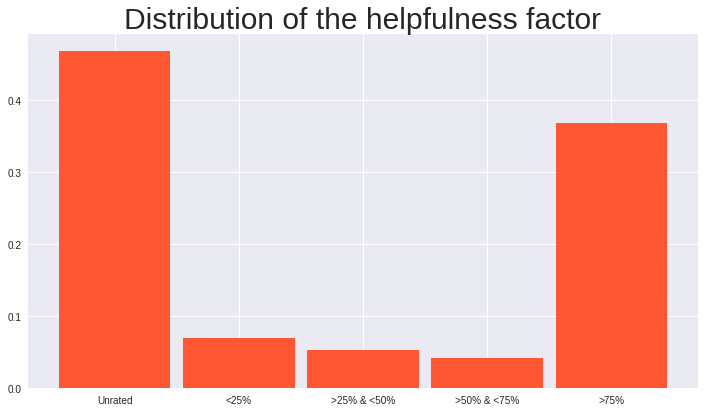

In [21]:
'''Let's plot the histogram of the help_factor that we just created'''
plt.figure(figsize=(12,6.5))
plt.hist(data=am_df,x='help_factor',normed=True,bins=[0,1,2,3,4,5],rwidth=0.9,color='#FF5733')
plt.xticks([0+.5,1+.5,2+.5,3+.5,4+.5],['Unrated','<25%','>25% & <50%','>50% & <75%','>75%'])
plt.title('Distribution of the helpfulness factor',fontdict={'fontsize':30})
plt.show()

This is similar to the distribution graph of the helfulness ratio

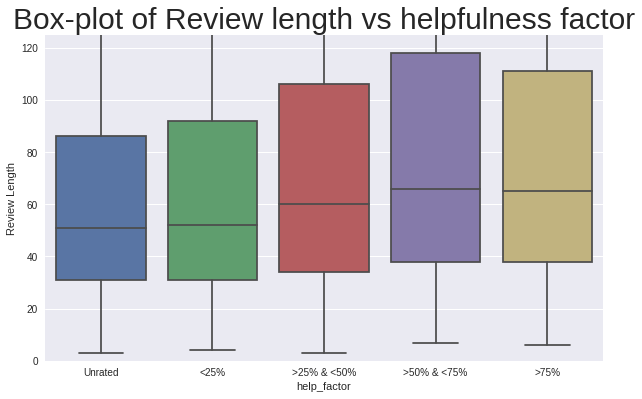

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(data=am_df,x='help_factor',y='Review Length')
plt.ylim(0,125)
plt.title('Box-plot of Review length vs helpfulness factor',fontdict={'fontsize':30})
plt.xticks([0,1,2,3,4],['Unrated','<25%','>25% & <50%','>50% & <75%','>75%'])
plt.show()

Here we can see that when the __helpfulness factor__ is greater than 75% & between 50-75%, the review lengths are largers and hence we can conclude that the _Longer reviews are more helpfull_

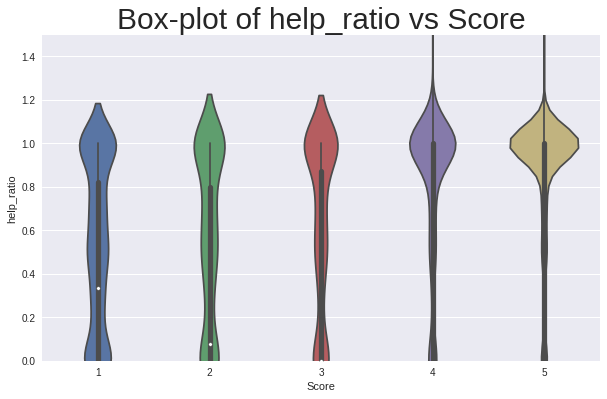

In [37]:
plt.figure(figsize=(10,6))
sns.violinplot(data=am_df,x='Score',y='help_ratio')
plt.ylim(0,1.5)
plt.title('Violin-plot of help_ratio vs Score',fontdict={'fontsize':30})
plt.show()

Here in the violin-plot we can see that the helpfullness ratio is more when score is 4,5. That means Positive reviews are more helpful

In [24]:
'''Creating a new column to indicate whether the user is frequent reviewer or not'''
from collections import Counter
frequency = dict(Counter(list(am_df['UserId']))); fVsNf = []
for i,row in am_df.iterrows():
    if(frequency[row['UserId']]>50):
        fVsNf.append('F')
    else:
        fVsNf.append('NF')
am_df['Freq-NonFreq'] = fVsNf

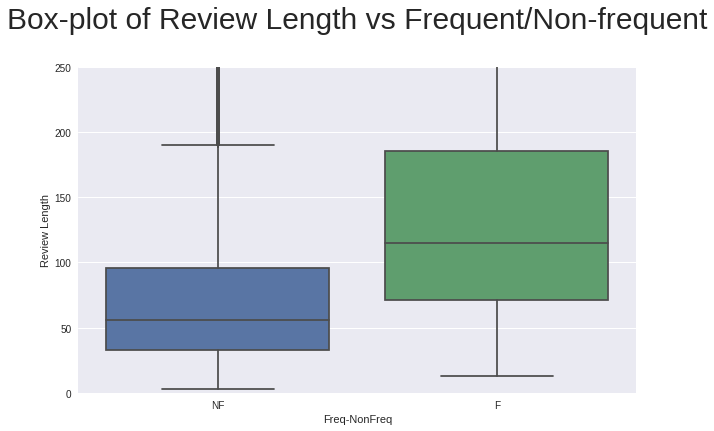

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(data=am_df,x='Freq-NonFreq',y='Review Length')
plt.ylim(0,250)
plt.title('Box-plot of Review Length vs Frequent/Non-frequent\n',fontdict={'fontsize':30})
plt.show()

In the above boxplot NF denotes reviewers who had written less than 50 reviews and F means those who had written greater than 50 reviews. From the box plot we can clearly see that the Frequent reviewers write longer reviews in general

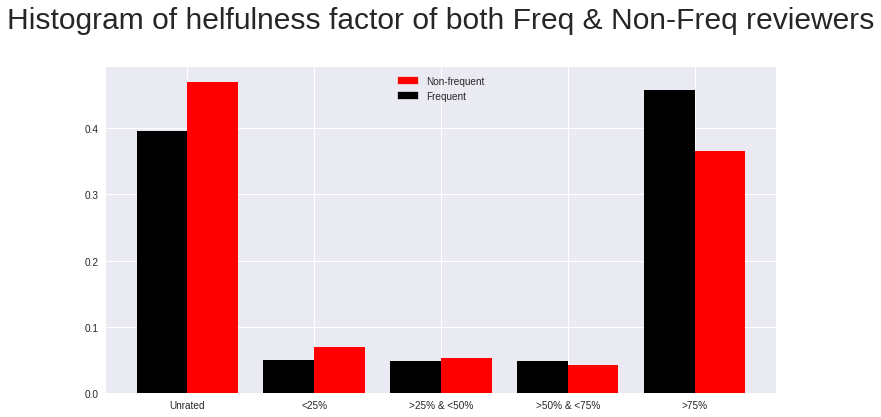

In [26]:
plt.figure(figsize=(12,6))

freq_fact = (am_df[am_df['Freq-NonFreq'] == 'F'])['help_factor']; freq_fact = list(freq_fact)
nfreq_fact = (am_df[am_df['Freq-NonFreq'] == 'NF'])['help_factor']; nfreq_fact = list(nfreq_fact)
plt.hist(x=[freq_fact,nfreq_fact],normed=True,bins=[0,1,2,3,4,5],color=['black','red'])
plt.xticks([0+.5,1+.5,2+.5,3+.5,4+.5],['Unrated','<25%','>25% & <50%','>50% & <75%','>75%'])
plt.title('Histogram of helfulness factor of both Freq & Non-Freq reviewers\n',fontdict={'fontsize':30})

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Non-frequent')
black_patch = mpatches.Patch(color='black', label='Frequent')
plt.legend(handles=[red_patch,black_patch])
plt.show()

Here we can see that when helpfulness factor is greater than 25%, we get higher probability that the review is from a frequent reviewer and the difference is much higher when the helpfulness is greater than 75%.

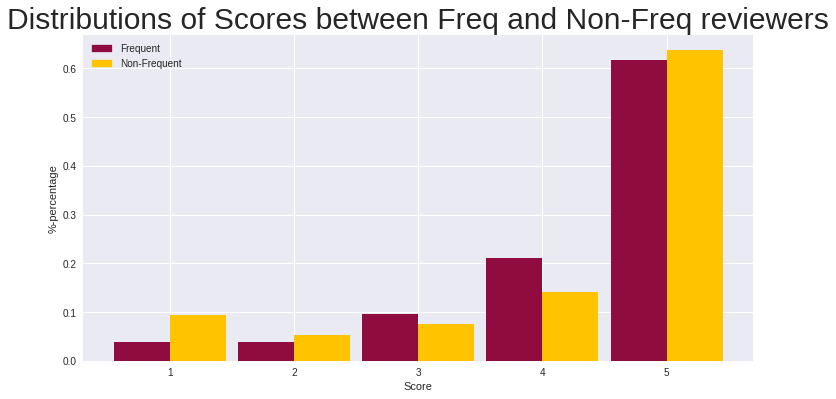

In [27]:
plt.figure(figsize=(12,6))
freq_revr_score = list(am_df[am_df['Freq-NonFreq']=='F'].Score)
nfreq_revr_score = list(am_df[am_df['Freq-NonFreq']=='NF'].Score)

plt.hist(x=[freq_revr_score,nfreq_revr_score],color=['#900c3f','#ffc300'],\
         bins=[1,2,3,4,5,6],normed=True,rwidth=0.9)
plt.xticks([1.5,2.5,3.5,4.5,5.5],[1,2,3,4,5])
plt.xlabel('Score'); plt.ylabel('%-percentage')

red_patch = mpatches.Patch(color='#900c3f', label='Frequent')
black_patch = mpatches.Patch(color='#ffc300', label='Non-Frequent')
plt.legend(handles=[red_patch,black_patch])
plt.title('Distributions of Scores between Freq and Non-Freq reviewers',fontdict={'fontsize':30})
plt.show()

From the above histogram it is seen that Frequent reviewrs have given more 3 and 4 star rating compared to non-frequent reviewers 

In [28]:
'''Separating the postive sentiment from the negative sentiment'''
pos_df = am_df[am_df['Score']>=4]; neg_df = am_df[am_df['Score']<=2]

In [29]:
'''Creating a big string consisting of all the reviews'''
flag_pos = " ".join(list(pos_df['Text']))
flag_neg = " ".join(list(neg_df['Text']))

In [30]:
'''Removing HTML tags before Showing wordcloud'''
import re
flag_pos = re.sub('<[^>]*>', '', flag_pos)
flag_neg = re.sub('<[^>]*>', '', flag_neg)

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

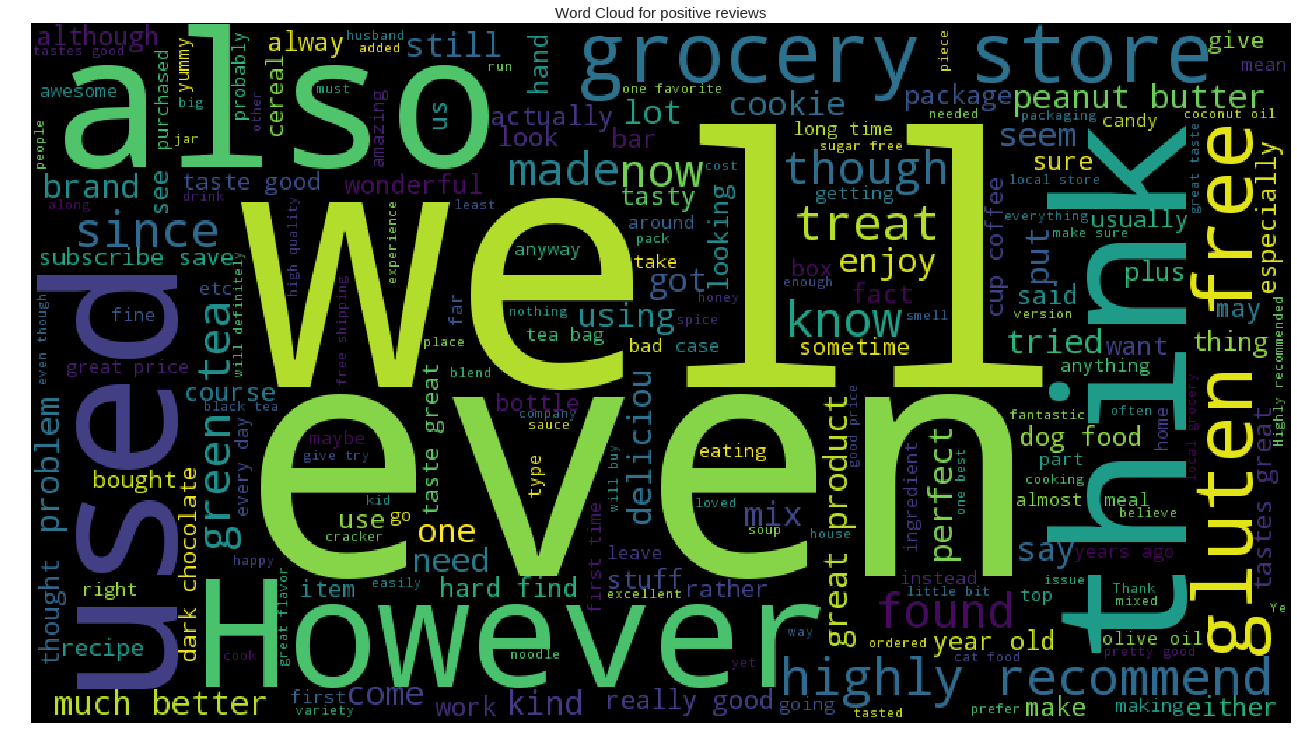

In [38]:
plt.figure(figsize=(20,10),facecolor='w')
'''Creating a wordcloud of positive words'''
wc_pos = WordCloud(background_color='black',width=900,height=500).generate(flag_pos)
plt.imshow(wc_pos)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('Word Cloud for positive reviews',fontdict={'fontsize':15})

plt.show()

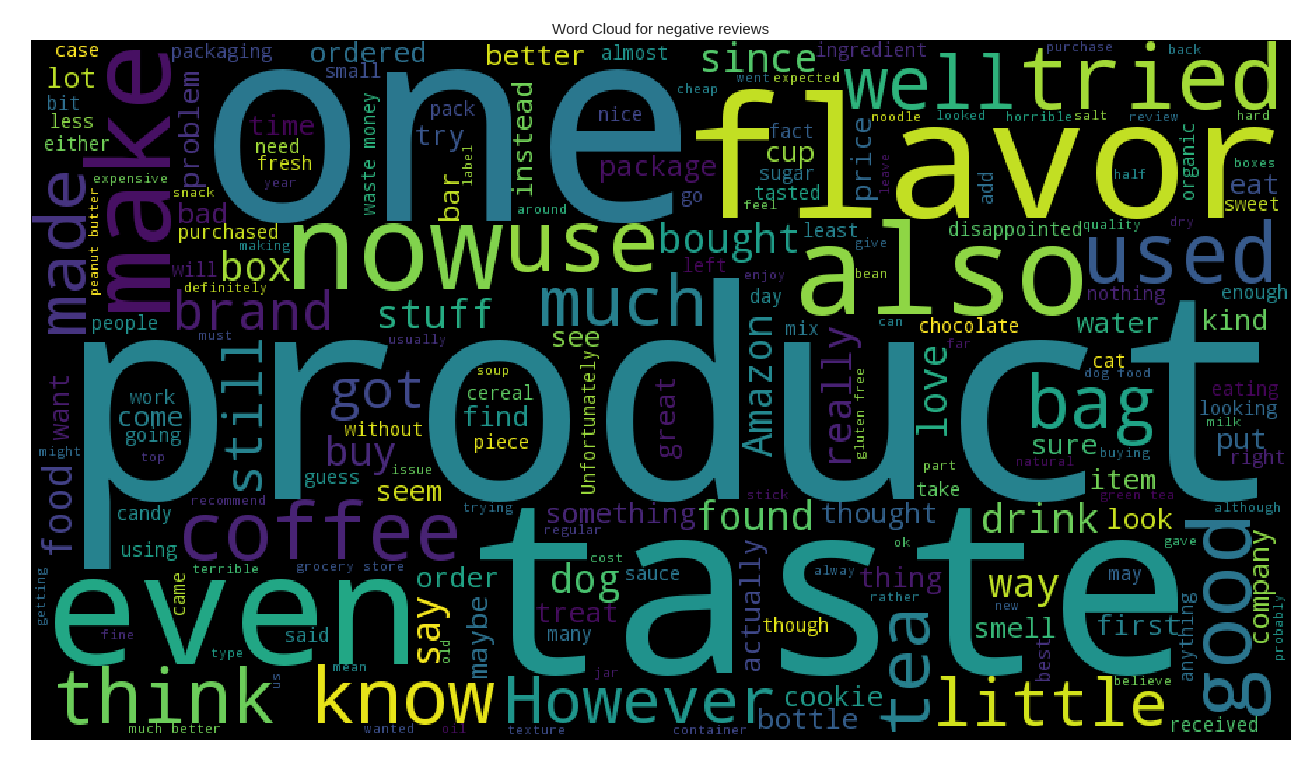

In [39]:
plt.figure(figsize=(20,10),facecolor='w')
'''Creating a wordcloud of negative words'''
wc_neg = WordCloud(background_color='black',width=900,height=500).generate(flag_neg)
plt.imshow(wc_neg)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('\nWord Cloud for negative reviews',fontdict={'fontsize':15})

plt.show()

# Conclusion:
* 5 star the most commonn and then 4 star, then 1, then 3 and the least is 2 stars
* Positive reviews are usually shorter in length
* Longer reviews are more helpful
* Positive reviews are more helpful despite being shorter
* Frequent reviewers write longer reviews 
* When a review is more helpfull then the chance it came from a frequent reviewer is higher
* 3 star reviews are the longest
* Most of the reviews are either unhelpfull or unrated.
* When separated I found, the number of unrated reviews are the highest. After that the most helpfull ones, then the most helpfull ones, then the least helpfull and then 50% helpfull and 50% unhelpful

# Understanding 3 star Reviews

In [34]:
'''Picking up the 3 star reviews'''
three_star_rev = list(am_df[am_df['Score']==3].Text)

In [35]:
three_star_rev = ' '.join(three_star_rev)
three_star_rev = re.sub('<[^>]*>', '', three_star_rev)
three_star_rev = re.sub('[0-9]+','',three_star_rev)

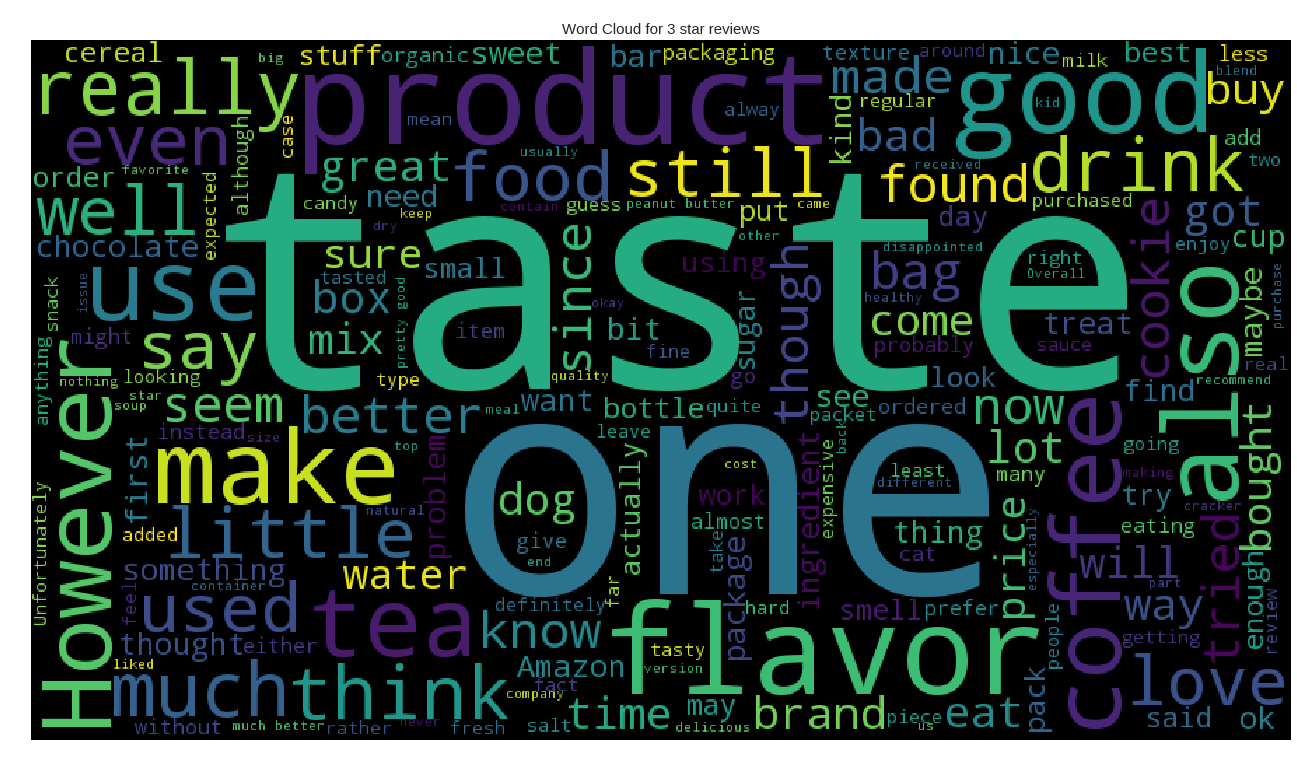

In [40]:
plt.figure(figsize=(20,10),facecolor='w')
'''Creating a wordcloud of 3star reviews'''
wc_3 = WordCloud(background_color='black',width=900,height=500).generate(three_star_rev)
plt.imshow(wc_3)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('\nWord Cloud for 3 star reviews',fontdict={'fontsize':15})

plt.show()